In [251]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## IMPORT MODEL

In [252]:
source_path = "./model/client_model/best.pt"
model = YOLO(source_path)

## IMPORT VIDEO

In [253]:
video_source_path = './dataset/Video/Video_3.mp4'
cap = cv2.VideoCapture(video_source_path)

## IMPORT PHOTO

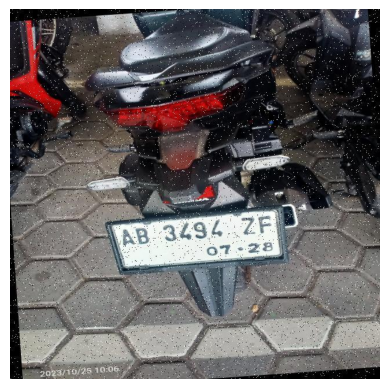

In [254]:
photo_source_path = './dataset/Foto/K2_AB3494ZF_jpg.rf.85eec8252e637af4b08bd271b584c014.jpg'
image = cv2.imread(photo_source_path)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()

## CLASS MAPPING

In [255]:
class_mapping = {0 : "Mobil", 1 : "Motor", 2 : "Plat Nomor"}

In [256]:
car_box_color = (255, 0, 0)   # Warna merah
motor_box_color = (0, 255, 0)  # Warna hijau
plate_box_color = (0, 0, 255)  # Warna biru

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_thickness = 2

## PHOTO DETECTION

In [257]:
detections = model(image)[0]

for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    # Mengukur tinggi teks
    text_size = cv2.getTextSize(class_mapping[class_id], font, font_scale, font_thickness)[0]
    text_height = text_size[1]
    if class_id == 0:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), car_box_color, thickness=2)
        if int(y1) >= text_height + 5:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, car_box_color, font_thickness)
        else:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, car_box_color, font_thickness)
    elif class_id == 1:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), motor_box_color, thickness=2)
        if int(y1) >= text_height + 5:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, motor_box_color, font_thickness)
        else:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, motor_box_color, font_thickness)
    elif class_id == 2:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), plate_box_color, thickness=2)
        if int(y1) >= text_height + 5:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, plate_box_color, font_thickness)
        else:
            cv2.putText(img_rgb, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, plate_box_color, font_thickness)


0: 800x800 1 Motor, 1 Plat Nomor, 16.0ms
Speed: 5.6ms preprocess, 16.0ms inference, 2.6ms postprocess per image at shape (1, 3, 800, 800)


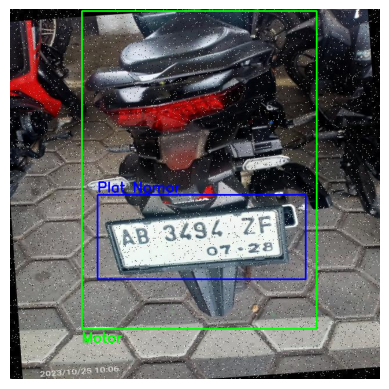

In [258]:
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()

## VIDEO DETECTION

### SAVE VIDEO

In [259]:
# Define parameters for the output video
output_video_path = './predict/predict_video_2.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 video
output_fps = 30.0  # Frames per second

# Check if video capture is opened successfully
if not cap.isOpened():
    print("Error reading video file")
    exit()  # Exit the program if there's an error

# Get video frame width and height (assuming cap is already defined)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create the video writer object
out = cv2.VideoWriter(output_video_path, fourcc, output_fps, (frame_width, frame_height))

### PREDICT VIDEO

In [260]:
ret = True
frame_rate = 0
id = 0

while ret:
    ret, frame = cap.read()
    ret2, frame_capture = cap.read()

    if not ret:
        break  # Keluar dari loop jika tidak ada frame yang 

    detections = model(frame)[0]
    frame_rate += 1

    for detection in detections.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = detection
        # Mengukur tinggi teks
        text_size = cv2.getTextSize(class_mapping[class_id], font, font_scale, font_thickness)[0]
        text_height = text_size[1]
        if class_id == 0:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), car_box_color, thickness=2)
            if int(y1) >= text_height + 5:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, car_box_color, font_thickness)
            else:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, car_box_color, font_thickness)
        elif class_id == 1:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), motor_box_color, thickness=2)
            if int(y1) >= text_height + 5:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, motor_box_color, font_thickness)
            else:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, motor_box_color, font_thickness)
        elif class_id == 2:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), plate_box_color, thickness=2)
            if int(y1) >= text_height + 5:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y1) - 5), font, font_scale, plate_box_color, font_thickness)
            else:
                cv2.putText(frame, class_mapping[class_id], (int(x1), int(y2) + text_height + 5), font, font_scale, plate_box_color, font_thickness)
        
    new_height = int(frame.shape[0] * 0.3)  # 25% dari tinggi frame asli
    new_width = frame.shape[1]  # Lebar sesuai dengan frame asli

    # Hitung koordinat untuk rectangle
    top_left_x = 0
    top_left_y = frame.shape[0] - new_height - int(frame.shape[0] * 0)  # Angkat rectangle ke tengah 20%
    bottom_right_x = frame.shape[1]
    bottom_right_y = top_left_y + new_height
    
    # Buat rectangle menggunakan koordinat tersebut
    cv2.rectangle(frame, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 255), thickness=2)
    
    license_detection_frame = frame_capture[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    license_detections = model(license_detection_frame)[0]
    
    for license_detection in license_detections.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = license_detection
        if class_id == 2:
            license_detected = license_detection_frame[int(y1):int(y2), int(x1):int(x2)]  # Mengonversi ke tipe data integer
            name_file = f"./license_predict/{id}.jpg"
            if frame_rate % 10 == 0 :  # Simpan gambar lisensi hanya setiap lima frame
                cv2.imwrite(name_file, license_detected)
                id += 1
    
    ## MENAMPILKAN LIVE
    # Mendapatkan dimensi asli frame
    original_height, original_width = frame.shape[:2]

    # Hitung faktor skala untuk menyesuaikan frame agar muat dalam satu layar laptop
    screen_height = 720  # Misalnya, resolusi layar laptop adalah 720p
    screen_width = 1280  # Misalnya, resolusi layar laptop adalah 1280p
    scale_factor = min(screen_height / original_height, screen_width / original_width)

    # Resize frame sesuai dengan faktor skala
    resized_frame = cv2.resize(frame, None, fx=scale_factor, fy=scale_factor)

    # Menampilkan frame yang telah diresize
    cv2.imshow('Resized Frame', resized_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Tunggu 1ms, jika tombol 'q' ditekan, hentikan loop
        break
    
cv2.destroyAllWindows()

0: 480x800 1 Mobil, 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 160x800 1 Mobil, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 800)

0: 480x800 1 Mobil, 11.5ms
Speed: 4.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 160x800 2 Mobils, 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 800)

0: 480x800 1 Mobil, 12.1ms
Speed: 3.0ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 160x800 2 Mobils, 1 Motor, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.5ms postprocess per image at shape (1, 3, 160, 800)

0: 480x800 1 Mobil, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 160x800 2 Mobils, 9.2ms
Speed: 0.0ms preprocess, 9.2ms inference, 2.2ms postprocess per image at shape (1, 3, 160, 80